## CREATING THE GRAPH CLASS

In [46]:
class Graph:
    def __init__(self):
        self.adj=[]         
        self.ne=0   ##number of edges
        
    def numEdges(self):
        return self.ne
    
    def addNode(self):
        self.adj.append([])
        ##it puts an emptylist in the empty list [[..]]
        ##ther list here has lenght one now!!!
    
    def numNodes(self):
        return len(self.adj)
    
    def isEdge(self,i,j):
        return ((i in self.adj[j]) and (j in self.adj[i]))
    
    
    def addEdge(self,i,j):
        ## to call this i suppose that the list is defined
        ## with j nodes
        if not self.isEdge(i,j):
            self.adj[j].append(i)
            self.adj[i].append(j)
            g.ne+=1
        elif (i==j):
            raise Exception("you cannot add a loop in this graph")
        else:
            raise Exception("the edge is already present in the graph")
            
    def neighbors(self,i):
        return self.adj[i]:
        
        
    def degree(self,i):
        return len(neighbors(self,i))
    
    
    
        
    



In [47]:
g=Graph()
assert isinstance(g,Graph)
assert g.numEdges()==0
assert g.numNodes()==0
##g.addNode()

## if it ok it doesn't print anything, if its wrong it complains

In [48]:
g.adj

[]

In [49]:
g.addNode()

In [50]:
g.adj

[[]]

In [51]:
g.addNode()
g.addNode()
g.addNode()
g.adj

[[], [], [], []]

In [52]:
g.isEdge(1,2)

False

In [53]:
g.addEdge(1,2)

In [54]:
g.adj

[[], [2], [1], []]

In [55]:
g.addEdge(1,2)

Exception: the edge is already present in the graph

In [57]:
g.addEdge(1,1)

Exception: you cannot add a loop in this graph

the exceptions work well

## Now lets do with arrays

In [164]:
import numpy as np

class Graph:
    def __init__(self):
        self.adj=[]         
        self.ne=0   ##number of edges
        
    def numEdges(self):
        return self.ne
    
    def addNode(self):
        self.adj.append(np.array([],dtype="int64"))
        ##it puts an emptylist in the empty list [[..]]
        ##ther list here has lenght one now!!!
    
    def numNodes(self):
        return len(self.adj)
    
    def isEdge(self,i,j):
        return ((i in self.adj[j]) and (j in self.adj[i]))
    ##this remains unchanged for nmpy arrays
    
    
    def addEdge(self,i,j):
        ## to call this i suppose that the list is defined
        ## with j nodes
        ##here we have to resize the array, be carefull at the difference between resize and reshape!
        if not self.isEdge(i,j):
            self.adj[i].resize(len(self.adj[i]) + 1, refcheck=False)
            ##this adds a 0 at the end, now i gotta put j in this position
            self.adj[i][len(self.adj[i])-1]=j
            
            self.adj[j].resize(len(self.adj[j]) + 1, refcheck=False)
            ##this adds a 0 at the end, now i gotta put j in this position
            self.adj[j][len(self.adj[j])-1]=i
            
            g.ne+=1
        elif (i==j):
            raise Exception("you cannot add a loop in this graph")
        else:
            raise Exception("the edge is already present in the graph")
            
    def neighbors(self,i):
        return self.adj[i]
        
        
    def degree(self,i):
        return len((self.neighbors(i)))
    
    def addNodes(self,n):
        for i in range(n):
            self.addNode()
        return
        

In [165]:
g=Graph()

In [166]:
g.addNode()

In [167]:
g.addNode()

In [168]:
g.addNode()

In [169]:
g.adj

[array([], dtype=int64), array([], dtype=int64), array([], dtype=int64)]

In [170]:
g.ne

0

In [171]:
g.degree(1)

0

In [172]:
g.addNode()

In [173]:
g.adj

[array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64)]

In [174]:
g.addEdge(1,2)

In [175]:
g.adj

[array([], dtype=int64), array([2]), array([1]), array([], dtype=int64)]

It works

In [176]:
g.addNodes(3)

In [177]:
g.adj

[array([], dtype=int64),
 array([2]),
 array([1]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64)]

## Now lets modify the init function so that i can creat a graph with tot nodes at the beginning

In [253]:
import numpy as np

class Graph:
    def __init__(self,n=0):     ##it tells us that the default number of nodes is equal to 0
        '''Creates a graph with n+1 nodes, the 0-th node has no use and should never be accounted for'''
        self.adj=[]         
        self.ne=0   ##number of edges
        for i in range(n+1):   ##to create a correspondance node-edge we overadd the 0-th node which to us is useless since it is easier to think of nodes from 1 to n rather then from 0 to n-1
            self.addNode()     ##not sure it is gonna work,lets see......
    def __str__(self):
        return "Graph( "+ str(self.numNodes()) +" , "+ str(self.numEdges()) +" )"
        ##il + serve a concatenare stringhe diverse, in quanto senno
        ## cercavo di fare stringa (Graph) di sommarle l'intero dato dal self.numEdges()
        ## e questa operazionen non è ben definita.
        
    def __add__(self,other):
        from copy import deepcopy
        if (self.numNodes()!=other.numNodes()):
            raise Exception("you cannot add two graphs that have different number of nodes")
            
        else:
            if (self.numEdges()>other.numEdges()):
                g=deepcopy(self)
                for i in range(self.numNodes()):
                    ##print("i vale ",i)
                    list=other.Edges(i)
                    for j in range(len(list)):
                        print("j vale ",j)
                        g.addEdge(i,list[j][1])
                        
            else:
                g=deepcopy(other)
                for i in range(self.numNodes()):
                    list=self.Edges(i)
                    for j in range(len(list)):
                        g.addEdge(i,list[j][1])
            return g
              
    def __iadd__(self,other):
        if (self.numNodes()!=other.numNodes()):
            raise Exception("you cannot do this stupid")
        else:
            for i in range(self.numNodes()):
                    ##print("i vale ",i)
                    list=other.Edges(i)
                    for j in range(len(list)):
                        print("j vale ",j)
                        self.addEdge(i,list[j][1])
        return 
                        
                        
    def __sub__(self,other):
        '''Checks it the two Graphs have the same number of nodes, then subtracts other to self'''
        from copy import deepcopy
        if (self.numNodes()!=other.numNodes()):
            raise Exception("you cannot add two graphs that have different number of nodes")
            
        else:
            
                g=deepcopy(self)
                for i in range(self.numNodes()):
                    ##print("i vale ",i)
                    list=other.neighbors(i)
                    for j in range(len(list)):
                        ##print("j vale ",j)
                        print( "i wanna remove the edge(" +str(i) + "," +str(list[j]) + ")" )
                        g.remEdge(i,list[j])
        
        return g
    
      ##def __isub__(self,other):
        
            ##if (self.numNodes()!=other.numNodes()):
                ##raise Exception("you cannot do this stupid")
            ##else:
                #àfor i in range(self.numNodes()):
                    ##print("i vale ",i)
                    #list=other.neighbors(i)
                    #for j in range(len(list)):
                        ##print("j vale ",j)
                        #self.remEdge(i,list[j])
            #return

            
    def __eq__(self,other):
        '''First it checks if the 2 Graphs have the same number of nodes, if it True  checks if they are equal,etherwise returns False'''
        if (self.numNodes()!=other.numNodes()):
            print("due grafi aventi numero diverso di nodi non possono essere uguali")
            return False
        else:
            for i in range(self.numNodes()-1):
                if (all(self.neighbors(i+1)==other.neighbors(i+1))):
                    ##i had to put i+1 etherwise the 0th node could have given problems
                    print("these two are equal")
                else:
                    return False
            ## if it exits the for these means they are equal so i return True
            return True
    
    def __getitem__(self,nlist):
        '''return the subgraph corresponding to the nodes of nlist'''
        return (self.subGraph(nlist))
    
    
    
    def completeGraph(self):
        '''Takes a graph of n nodes and adds all the edges missing in the Grahp'''
        for i in range(self.numNodes()-1):##remember i have n+1 nodes! i have just to control the first half of the nodes
            for j in [i+j for j in range(self.numNodes()-i-1)]:   ##len(self.numNodes()-1):##  ## i put the minus 1 because i don't want the 0th node
                self.addEdge(i+1,j+1)
        return
    def subGraph(self,nlist):
        g2=Graph(len(nlist))
        print("il numero di nodi è ",g2.numNodes())
        for i in range(g2.numNodes()):
            for j in [i+j+1 for j in range(g2.numNodes()-i-2)]:
                print("("+str(nlist[i])+","+str(nlist[j])+")")
                if (self.isEdge(nlist[i],nlist[j])): ##here i donìt have to add 1 to i and j
                    g2.addEdge(i+1,j+1)
        return g2 
                
            
        
            
        
                        
    def numEdges(self):
        '''Returns the number of edges of the graph'''
        return self.ne
    
    def addNode(self):
        '''Adds a node to the graph'''
        self.adj.append(np.array([],dtype="int64"))
        ##it puts an emptylist in the empty list [[..]]
        ##ther list here has lenght one now!!!
    
    def numNodes(self):
        '''Return the number of nodes'''
        return len(self.adj)
    
    def isEdge(self,i,j):
        '''Returns True if the edge (i,j) in in the graph'''
        ##return ((i in self.adj[j]) and (j in self.adj[i]))
        ##since by construction if we put (i,j) we also put (j,i) is enough to do this:
        return (i in self.adj[j])
    ##this remains unchanged for nmpy arrays
    
    
    def addEdge(self,i,j):
        '''Verifies if the edge (i,j) is in the grapho,if it is not it adds it,etherwise does nothing'''
        ## to call this i suppose that the list is defined
        ## with j nodes
        ##here we have to resize the array, be carefull at the difference between resize and reshape!
        if self.isEdge(i,j):
            print("the edge is already in the graph")
            return
        elif ( i==j ):
            print("you cannot create a loop")
            return
        
        else:
            self.adj[i].resize(len(self.adj[i]) + 1, refcheck=False)
            ##this adds a 0 at the end, now i gotta put j in this position
            self.adj[i][len(self.adj[i])-1]=j
            ## i can do this because i created n+1 nodes!
            
            self.adj[j].resize(len(self.adj[j]) + 1, refcheck=False)
            ##this adds a 0 at the end, now i gotta put j in this position
            self.adj[j][len(self.adj[j])-1]=i
            
            g.ne+=1
        return 
            
    def neighbors(self,i):
        '''Returns the array of nodes to which i is connected trough an edge'''
        return self.adj[i]
        
        
    def degree(self,i):
        '''Return the number of edges containing i'''
        return len((self.neighbors(i)))
    
    def addNodes(self,n):
        '''Adds n nodes to the graph'''
        for i in range(n):
            self.addNode()
        return
    
    def Edges(self,i=None):
        '''Return the list of Edges containing i in the form of tuples (i,j)'''
        l=[]
        if i==None:
            for j in range(self.numNodes()):
                for k in range(self.degree(j)):
                    if (j<k):                      ##etherwise i would count some edges twice
                        l.append((j,self.neighbors(j)[k]))
            ##print(l)
            return l
        
        for j in range(self.degree(i)):
            l.append((i,self.neighbors(i)[j]))
        ##print(l)
            
        return l
    
    
    ##from here is class 12
    def remEdge(self,i,j):
        '''Verifies if the Edge (i,j) is in the graph, if it is it removes it, etherwise it does nothing'''
        ## i use the fact that i know that if i is in j than by constr j is in i
        if ((self.adj[i]==j).any()):
            print("the edge is present in the graph, now i'll delete it")
            
            index=(self.adj[i]==j).nonzero()
            ##i have the index i was searching for,it's already scaled, i don't have to subtract 1
            ##i swap this with the last index so i can use 'pop'
            
            aux=self.adj[i][len(self.adj[i])-1]
            self.adj[i][len(self.adj[i])-1]=self.adj[i][index[0]]
            self.adj[i][index[0]]=aux
            ##i swapped the two elements
            self.adj[i].resize(len(self.adj[i]) - 1, refcheck=False)
            ##it should take away the last element
            
            ##now i do the same for j
            index=(self.adj[j]==i).nonzero()
            aux=self.adj[j][len(self.adj[j])-1]
            self.adj[j][len(self.adj[j])-1]=self.adj[j][index[0]]
            self.adj[j][index[0]]=aux
            self.adj[j].resize(len(self.adj[j]) - 1, refcheck=False)
            g.ne-=1
            return
        else:
            print("you cannot remove an edge that it is not present in the graph")
            return
    
    def graphPlot(self):
        import matplotlib.collections as mc
        import matplotlib.pyplot as plt
        ##remember that the actual number of nodes is one less than the one the function gives
        ## if you want change the function numNodes
        n=self.numNodes()
        points=np.array([np.random.random(n),np.random.random(n)]).T
        ## i do this because it's more easy than to access the points! (a columns is (x-axis,y-axis) )
        ## the point in position [0,0] is useless, i will never connect it, don't put it in the scatterplot
        lines=[]
        for j in range(self.numNodes()):
                for k in range(self.degree(j)):
                    if (j<self.neighbors(j)[k]):                      ##etherwise i would count some edges twice
                        lines.append([points[j],points[self.neighbors(j)[k]]])
            ##print(l)
        ## understand how these commands work   
        print("le linee sono:")
        print (lines)
        lc = mc.LineCollection(lines, linewidths=2)
        fig, ax = plt.subplots()
        ax.add_collection(lc)
        plt.scatter(points[1:,0],points[1:,1], marker = "*",color="red")
        plt.show()
        ## i pass the first and the second columns that are the x-axis and the y-axis of the points,remember to 
        ## reject the first point 
        return
        
        
        
            
    
  
   

    

In [39]:
x=np.array([1,2,3,4])
(x==3).nonzero()

(array([2]),)

In [15]:
g=Graph(3)

In [324]:
g.numNodes()


3

In [325]:
##g.addEdge(0,0)
##g.adj

IT worksssss!!!

In [331]:
def erdos_renyi(n,p):
    g=Graph(n)
    x=np.random.random_sample((n,n))>p        ## i use numpy array so i can broadcast operations
    print(x)
    ##the values of the matrix which are equal to one will be the nodes that i will add.
    ##i could sroll tha matrix of find a way to get the indexes...
    r,c=x.nonzero()
    #print(r)
    #print(c)
    
    for i in range(len(r)):
        if (r[i]<c[i]):               ##make it prettier....i am trying to check the top triangular part...
            g.addEdge(r[i],c[i])
    return g    
        


In [332]:
g=erdos_renyi(5,0.55)

[[ True  True False False False]
 [False False  True  True  True]
 [False  True  True  True False]
 [False  True  True  True  True]
 [False False  True  True  True]]
[0 0 1 1 1 2 2 2 3 3 3 3 4 4 4]
[0 1 2 3 4 1 2 3 1 2 3 4 2 3 4]


In [333]:
g.adj

[array([1]),
 array([0, 2, 3, 4]),
 array([1, 3]),
 array([1, 2, 4]),
 array([1, 3])]

it doesn't work as it should, it should give a loop warning, but it doesn't...
Found the error, it was on how i defined the add Edge function, i put the conditions in the wrong order, it was weird mistake but i understood it

In [318]:
g.Edges()

[]


[]

Ok i have just to fix the print

## QUA INIZIA LA SCHEDA DI ESERCIZI DELLA LEZIONE 12

In [85]:
g=Graph(5)
g.adj

[array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64)]

In [86]:
g.addEdge(1,2)
g.addEdge(2,3)
g.addEdge(5,2)

In [65]:
## i do this because i know that the 0-th element by definition is useless
g.adj[1:]

[array([2]), array([1, 3, 5]), array([2]), array([], dtype=int64), array([2])]

Works better now

In [44]:
g.remEdge(5,2)
g.adj[1:]
## i have a problem here
##problem solved

the edge is present in the graph, now i'll delete it


[array([2]),
 array([1, 3]),
 array([2]),
 array([], dtype=int64),
 array([], dtype=int64)]

In [45]:
g.remEdge(2,3)

the edge is present in the graph, now i'll delete it


In [46]:
g.adj

[array([], dtype=int64),
 array([2]),
 array([1]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64)]

In [47]:
g.ne

1

In [93]:
g.remEdge?

Signature: g.remEdge(i, j)
Docstring: Verifies if the Edge (i,j) is in the graph, if it is it removes it, etherwise it does nothing
File:      ~/Desktop/database_systems/my_codes/<ipython-input-84-1f2370b45b14>
Type:      method


In [94]:
print(g)

Graph( 5 , 2 )


In [256]:
g2=Graph(5)

In [257]:
g2.addEdge(1,2)
g2.addEdge(2,4)
g2.addEdge(3,4)
g2.addEdge(1,4)

In [110]:
g2==g

False

In [89]:
g3=g+g2

j vale  0
the edge is already in the graph
j vale  1
j vale  0
the edge is already in the graph
j vale  1
j vale  0
j vale  0
the edge is already in the graph
j vale  1
the edge is already in the graph
j vale  2
the edge is already in the graph


In [90]:
g.adj[1:]

[array([2]), array([1, 3, 5]), array([2]), array([], dtype=int64), array([2])]

In [94]:
g2.adj[1:]

[array([2, 4]),
 array([1, 4]),
 array([4]),
 array([2, 3, 1]),
 array([], dtype=int64)]

In [92]:
g3.adj[1:]

[array([2, 4]),
 array([1, 3, 5, 4]),
 array([2, 4]),
 array([1, 2, 3]),
 array([2])]

In [95]:
##g4=g3-g2
## correct

In [59]:
g4.adj[1:]

[array([], dtype=int64),
 array([5, 3]),
 array([2]),
 array([], dtype=int64),
 array([2])]

In [60]:
g.adj[1:]

[array([2]), array([1, 3, 5]), array([2]), array([], dtype=int64), array([2])]

In [102]:
x=np.array([1,2,3])
y=np.array([1,2])
x==y

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


False

Ok it will return automatically false if the lenght is different.

In [142]:
g2.completeGraph()

you cannot create a loop
the edge is already in the graph
the edge is already in the graph
you cannot create a loop
the edge is already in the graph
you cannot create a loop
the edge is already in the graph
you cannot create a loop
you cannot create a loop


In [143]:
g2.adj

[array([], dtype=int64),
 array([2, 4, 3, 5]),
 array([1, 4, 3, 5]),
 array([4, 1, 2, 5]),
 array([2, 3, 1, 5]),
 array([1, 2, 3, 4])]

In [132]:
x=[1,2,3,4,5,6,7,8,9]

In [133]:
[2+j for j in range(len(x[2:]))]

[2, 3, 4, 5, 6, 7, 8]

In [148]:
##g2.adj

[array([], dtype=int64),
 array([2, 4]),
 array([1, 4]),
 array([4]),
 array([2, 3, 1]),
 array([], dtype=int64)]

In [170]:
g2_subgraph=g2.subGraph([2,4])

il numero di nodi è  3
(2,4)


In [171]:
type(g2_subgraph)


__main__.Graph

In [173]:
g2_subgraph.adj

[array([], dtype=int64), array([2]), array([1])]

In [178]:
aux=g2[[2,4]]

il numero di nodi è  3
(2,4)


In [179]:
aux.adj

[array([], dtype=int64), array([2]), array([1])]

In [187]:
x=np.array([np.random.random(5),np.random.random(5)])

In [188]:
x

array([[0.85542513, 0.50893907, 0.62697898, 0.07035996, 0.37814488],
       [0.08064505, 0.11848793, 0.62314172, 0.47496313, 0.07790282]])

In [189]:
x[0]

array([0.85542513, 0.50893907, 0.62697898, 0.07035996, 0.37814488])

In [190]:
y=x.T

In [191]:
y[0]

array([0.85542513, 0.08064505])

le linee sono:
[[array([0.85944531, 0.06942683]), array([0.23163536, 0.63347404])], [array([0.85944531, 0.06942683]), array([0.31909552, 0.74690272])], [array([0.23163536, 0.63347404]), array([0.31909552, 0.74690272])], [array([0.58528764, 0.44410765]), array([0.31909552, 0.74690272])]]


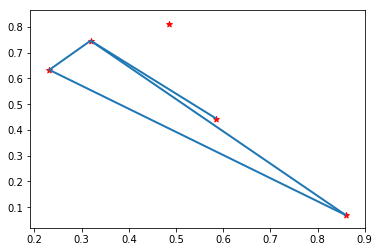

In [258]:
g2.graphPlot()